# Assignment 3
## 机器学习与人工智能 (Machine Learning and Artificial Intelligence)

### <font color='red'>Due Date: Nov 28, 2021 11:59pm</font> 

#### Student: Niklas Muennighoff, 孟念

# PCA

In [12]:
!unzip onion_vs_economist.zip

Archive:  onion_vs_economist.zip
   creating: onion_vs_economist/
  inflating: onion_vs_economist/stopwords.txt  
  inflating: onion_vs_economist/vocabulary.csv  
  inflating: onion_vs_economist/XTest.csv  
  inflating: onion_vs_economist/XTrain.csv  
  inflating: onion_vs_economist/yTest.csv  
  inflating: onion_vs_economist/yTrain.csv  


In [13]:
%matplotlib inline
import numpy as np

# load data
XTrain = np.genfromtxt('onion_vs_economist/XTrain.csv', delimiter=',')
XTest = np.genfromtxt('onion_vs_economist/XTest.csv', delimiter=',')
yTrain = np.genfromtxt('onion_vs_economist/yTrain.csv', delimiter=',')
yTest = np.genfromtxt('onion_vs_economist/yTest.csv', delimiter=',')
vocabulary = [x.strip() for x in list(open('onion_vs_economist/vocabulary.csv', 'r'))]
stopwords = list(open('onion_vs_economist/stopwords.txt', 'r'))[0].split()

# YOUR CODE

In [64]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(XTrain)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [67]:
# Shape is (num_components, features)
# num_components = min(num_samples, features)
print("Components: ", pca.components_.shape) 

best_component_idx = np.argmax(pca.explained_variance_ratio_)
best_component_var = round(pca.explained_variance_ratio_[best_component_idx] * 100, 2)

print(f"The top component at index {best_component_idx} explains {best_component_var}% of variance.")

Components:  (580, 26048)
The top component at index 0 explains 1.05% of variance.


In [83]:
top_abs_components = np.abs(pca.components_[best_component_idx, :])
top_k = 30
# -1 to reverse the array
top_indices = np.argsort(top_abs_components)[-top_k:][::-1]
print("Top Indices: ", top_indices)
top_voc = [vocabulary[i] for i in top_indices]
print("Top 30 words with the highest absolute coefficient in the top component:\n", "\n".join(top_voc))

low_indices = np.argsort(top_abs_components)[:top_k]
low_voc = [vocabulary[i] for i in low_indices]
print("30 words with the lowest absolute coeffecient in the top component: ", low_voc)

Top Indices:  [ 447 1169  468  136   12  189  181 1304  206  687  418    6  535  208
  937  121  148  776   60  209 1237  795 1547  269  102  420  432   97
  364  230]
Top 30 words with the highest absolute coefficient in the top component:
 help
power
do
now
there
may
seem
also
mr
peopl
few
govern
mani
about
most
some
countri
foreign
than
such
includ
even
anoth
no
much
between
both
into
becaus
which
30 words with the lowest absolute coeffecient in the top component:  ['claric', 'crossrefer', 'seaworthi', 'forth', 'interperson', 'rubber', 'ah64', 'eighth', 'cfp', 'martiniqu', 'lobbieshumanright', 'payphon', '117', 'nickl', 'nabisco', 'gesturesensit', 'radiat', 'harsher', 'acrossbuttonhol', 'allwhit', 'nogal', 'luo', 'ben', 'hourlong', 'mao', 'silent', 'premiumbrand', 'gamblingapp', 'sen', 'chicmo']


In [63]:
top_stopwords = {word: word in stopwords for word in top_voc}

count = sum(top_stopwords.values())

print(f"{count} out of {top_k} most important words are stopwords.")

top_stopwords

10 out of 30 most important words are stopwords.


{'about': True,
 'also': False,
 'anoth': False,
 'becaus': False,
 'between': True,
 'both': True,
 'countri': False,
 'do': False,
 'even': False,
 'few': False,
 'foreign': False,
 'govern': False,
 'help': False,
 'includ': False,
 'into': True,
 'mani': False,
 'may': False,
 'most': True,
 'mr': False,
 'much': False,
 'no': False,
 'now': False,
 'peopl': False,
 'power': False,
 'seem': False,
 'some': True,
 'such': True,
 'than': True,
 'there': True,
 'which': True}

In [81]:
stop_proportion = round((len(stopwords) / len(vocabulary)) * 100, 2)
print(f"Stopwords make up ~{stop_proportion}% of words")

Stopwords make up ~0.83% of words


- Indeed 33.3% out of the most impactful coefficients of the component explaining the most relevance are stopwords
- This is despite stopwords only being 0.83% of our total words, hence the above 33.3% are highly significant
- We can also observe that words with a low absolute coefficient are rarely used words, such as "claric", "seaworthi", "ah64"
  - This makes sense since they are likely to only occur in few of the documents, hence the variation from document to document they explain is tiny
- From the vocabulary, we can also see that it is likely preprocessed via e.g. lemmatization, as verbs are reduced to their stem ("including" -> "includ")

# Deep Learning

### Import MNIST Dataset

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

img_rows, img_cols = 28, 28
num_classes = 10 # class size
input_unit_size = 28*28 # input vector size

X_train = X_train.reshape(X_train.shape[0], input_unit_size)
X_test  = X_test.reshape(X_test.shape[0], input_unit_size)
X_train_image = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) 
X_test_image = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot representation
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# If it takes too long to run the clustering, you can use the sampled data to do the clustering.
X_train_sample = X_train[0:1000,:]
y_train_sample = y_train[0:1000,:]
X_train_image_sample = X_train_image[0:1000,:]

image_shape = X_train_image_sample[0].shape

In [6]:
'''
Train a two-layer neural network:
    Hidden layer: number of hidden units = 128, activation = ReLu
    Use Dropout Strategy
    Output layer: activation = softmax
    loss function: categorical_crossentropy
    optimizer: SGD
    metrics: accuracy
    (Regarding parameters that are not specified above, use the default values)
    
You need to use grid search to tune the dropout rate and the learning rate in SGD optimizer.

Hint: to define the estimator required in Grid Search, you might need to use KerasClassifier 
        (https://keras.io/scikit-learn-api/)

References: https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/ 

Delivery:
    Model performance
    Optimal model parameters
'''

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import GridSearchCV

# YOUR CODES

# To combine TF2-Keras & Sci-kit
!pip install -q scikeras

from scikeras.wrappers import KerasClassifier

def get_model(hidden_layer_dim, dropout_rate):
    model = keras.Sequential(
        [
          keras.Input(shape=(input_unit_size,), name="digits"),
          layers.Dense(hidden_layer_dim, activation="relu", name="dense_1"),
          tf.keras.layers.Dropout(dropout_rate, seed=42),
          layers.Dense(10, name="predictions", activation="softmax")
        ]
    )
    return model

clf = KerasClassifier(
    get_model,
    loss="categorical_crossentropy", # sparse_categorical_crossentropy if labels are not one hot
    hidden_layer_dim=128,
    dropout_rate=0.2,
    metrics=keras.metrics.CategoricalAccuracy(),
)


# Grid Search
params = {
    "hidden_layer_dim": [128],
    "optimizer": ["sgd"],
    "optimizer__learning_rate": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    "dropout_rate": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

gs = GridSearchCV(clf, params, refit=True, cv=3, scoring='accuracy')
gs.fit(X_train, y_train)

print("Delivery:")
print("Model performance Folds: ", gs.best_score_)
print("Model performance Test: ", gs.score(X_test, y_test))
print("Optimal parameters: ", gs.best_params_)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3504 - categorical_accuracy: 0.8968
Delivery:
Model performance Folds:  0.9381666666666666
313/313 [==============================] - 0s 1ms/step
Model performance Test:  0.9518
Optimal parameters:  {'dropout_rate': 0.3, 'hidden_layer_dim': 128, 'optimizer': 'sgd', 'optimizer__learning_rate': 0.1}


- Results:
  - K-fold accuracy: 93.82%
  - Test accuracy: 95.18%
  - Dropout rate: 0.3
  - SGD Learning Rate: 0.1

In [9]:
'''
Task: Explore the correlation between model preformance and the number of units

Delivery: Plot a graph where 
    the x-axis is the number of hidden units, 
    and the y-axis is the model performance (two lines: one with test loss, and one with test accuracy)
    

'''

units_grid = [2 ** x for x in range(0, 11)] # 2 -> 1024

test_losses = []
test_accs = []

for num_units in units_grid:
    # Use parameters found via GridSearch
    clf = KerasClassifier(
    get_model,
    loss="categorical_crossentropy", # sparse_categorical_crossentropy if labels are not one hot
    hidden_layer_dim=num_units,
    dropout_rate=0.3,
    metrics=keras.metrics.CategoricalAccuracy(),
    optimizer="sgd",
    optimizer__learning_rate=0.1,
    )

    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)

    preds = clf.predict_proba(X_test)
    losses = tf.keras.metrics.categorical_crossentropy(
    y_test, preds, from_logits=False, label_smoothing=0.0, axis=-1
    ).numpy()
    # Take the average of all sample losses
    avg_loss = sum(losses) / len(losses)

    test_losses.append(avg_loss)
    test_accs.append(acc)

313/313 [==============================] - 1s 3ms/step


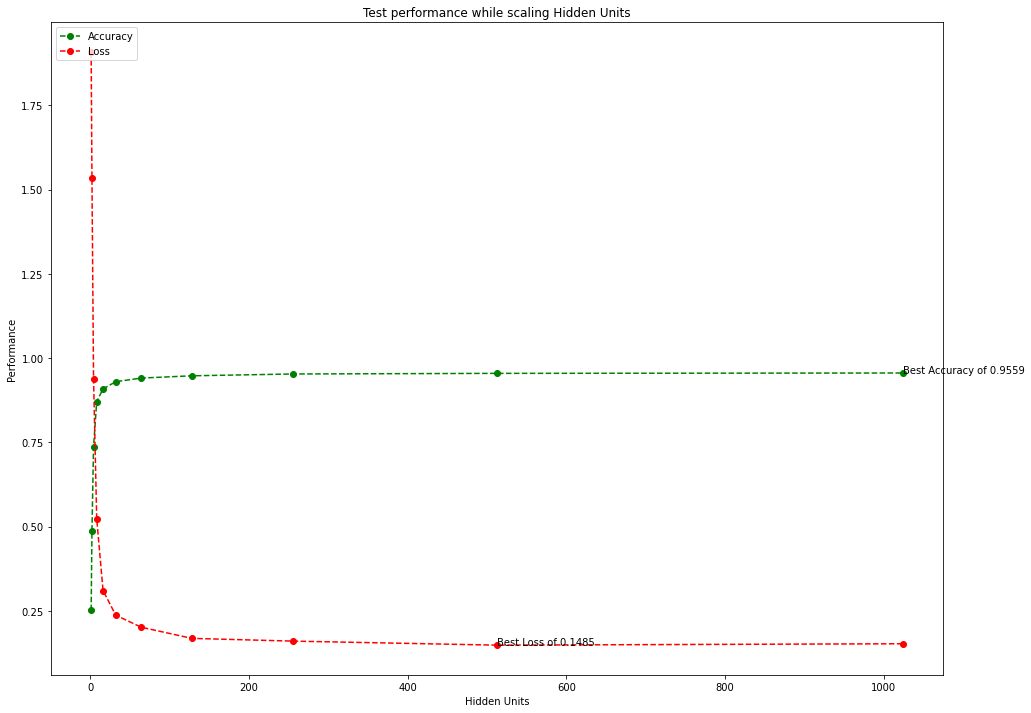

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

plt.plot(units_grid, test_accs, linestyle='--', marker='o', color='g', label='line with marker')
plt.plot(units_grid, test_losses, linestyle='--', marker='o', color='r', label='line with marker')

best_loss_idx = np.argmin(test_losses)
best_acc_idx = np.argmax(test_accs)

plt.annotate(f"Best Loss of {round(test_losses[best_loss_idx], 4)}", (units_grid[best_loss_idx], test_losses[best_loss_idx]))
plt.annotate(f"Best Accuracy of {round(test_accs[best_acc_idx], 4)}", (units_grid[best_acc_idx], test_accs[best_acc_idx]))

plt.xlabel("Hidden Units")
plt.ylabel("Performance")

plt.title('Test performance while scaling Hidden Units')
plt.legend(['Accuracy', 'Loss'], loc='upper left')

plt.show()

- As we increase hidden units, we gradually move from underfitting (high bias, low variance) to overfitting (low bias, high variance)
- We have found a loss optimum at 512 hidden units and slightly higher accuracy at 1024, though it could be more efficient to use multiple layers

References
- https://www.adriangb.com/scikeras/stable/notebooks/Basic_Usage.html
- TensorFlow, Keras, sci-kit documentation
- https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis